# Applied Data Science Capstone Project #

## 1. Introduction ##

### 1.1. Background ###

Istanbul is the largest city in Turkey, constituting the country's economic, cultural, and historical heart. Istanbul is a transcontinental city in Eurasia, with its commercial and historical centre lying on the European side and about a third of its population living on the Asian side of Eurasia. With a population of 15.07 million as of December 31 2018, the city forms the largest urban agglomeration in Europe as well as the largest in the Middle East, and the sixth-largest city proper in the world. Istanbul's vast area of 2,063 square miles is coterminous with Istanbul Province, of which the city is the administrative capital.

Istanbul has population density is 6,530 people per square mile and it has 39 districts in total.

Due to its historical significance and being in the intersection of three continents Istanbul is also known for great food. This makes Istanbul a desirable destination for tourist attraction and food related business opportunities.

### 1.2. Problem ###

Istanbul already has a lot of restaurants, but now many sushi restaurants. How should we decide the best location for a sushi restaurant?

In this project, I will examine and find the best location for opening a new sushi restaurant in Istanbul.

### 1.3. Interest ###

The results of this project can be helpful for investors, employees, suppliers, and food enthusiasts.

## 2. Data Acquisition and Cleaning ##

### 2.1. Data Sources ###

- [Second-level Administrative Divisions, Turkey, 2015 [1]](https://geo.nyu.edu/catalog/stanford-nj696zj1674) from Spatial Data Repository of NYU: A geojson file with the geometry objects of the districts of the cities of Turkey. The json file has the geometry shapes of all the districts. For this project, I will extract the rows for Istanbul and find the center points for each borough.

- [List of districts of Istanbul [2]](https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul) Wikipedia page lists the districts of Istanbul as of 2018. I will scrape the populations of each borough from this page.

- [Foursquare API [3]](https://developer.foursquare.com/): Will be used for finding the restaurants in each borough. I will send the category name as "Sushi Restaurant" and work with its results.

### 2.2. Data Acquisition and Cleaning ###

Install and import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd

Read the geojson file into a dataframe

In [2]:
df = gpd.read_file("https://geo.nyu.edu/download/file/stanford-nj696zj1674-geojson.json")

Look at the first 5 rows of the dataframe

In [3]:
df.head()

,id,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,ccn_2,cca_2,type_2,engtype_2,nl_name_2,varname_2,geometry
0,nj696zj1674.1,235,TUR,Turkey,1,Çanakkale,1,Çan,TR.CK.CA,0,None,District,District,None,None,"(POLYGON ((26.98407936 39.86386108, 26.9731197..."
1,nj696zj1674.2,235,TUR,Turkey,1,Çanakkale,2,Ayvacık,TR.CK.AY,0,None,District,District,None,None,"(POLYGON ((26.44069481 39.51625061, 26.4404163..."
2,nj696zj1674.3,235,TUR,Turkey,1,Çanakkale,3,Bayramiç,TR.CK.BA,0,None,District,District,None,None,"(POLYGON ((26.4226017 39.69835663, 26.42402458..."
3,nj696zj1674.4,235,TUR,Turkey,1,Çanakkale,4,Biga,TR.CK.BI,0,None,District,District,None,None,"(POLYGON ((27.57680511 40.31188583, 27.5807285..."
4,nj696zj1674.5,235,TUR,Turkey,1,Çanakkale,5,Bozcaada,TR.CK.BO,0,None,District,District,None,None,"(POLYGON ((26.06097221 39.9406929, 26.06097221..."


Filter the necessary columns

In [4]:
df = df[['name_1', 'name_2', 'geometry']]

Filter the rows with city name 'Istanbul'

In [5]:
df = df[df['name_1'] == 'Istanbul']

Reset index

In [6]:
df.reset_index(inplace=True, drop=True)

Take a look at the dataframe

In [7]:
df.head()

,name_1,name_2,geometry
0,Istanbul,Çatalca,"(POLYGON ((28.54563522 41.38847351, 28.5436115..."
1,Istanbul,Çekmekoy,"(POLYGON ((29.17944717 41.02779007, 29.1788482..."
2,Istanbul,Adalar,"(POLYGON ((29.0518055 40.91485977, 29.0518055 ..."
3,Istanbul,Ümraniye,"(POLYGON ((29.17944717 41.02779007, 29.1770515..."
4,Istanbul,Üsküdar,"(POLYGON ((28.20846939 41.06986237, 28.2070827..."


Since all boroughs are of Istanbul now, drop the "name_1" column

In [8]:
df.drop(['name_1'], axis=1, inplace=True)

Correct the column names

In [9]:
df.rename(columns= {'name_2': 'Borough'}, inplace=True)

Take another look at the dataframe

In [10]:
df.head()

,Borough,geometry
0,Çatalca,"(POLYGON ((28.54563522 41.38847351, 28.5436115..."
1,Çekmekoy,"(POLYGON ((29.17944717 41.02779007, 29.1788482..."
2,Adalar,"(POLYGON ((29.0518055 40.91485977, 29.0518055 ..."
3,Ümraniye,"(POLYGON ((29.17944717 41.02779007, 29.1770515..."
4,Üsküdar,"(POLYGON ((28.20846939 41.06986237, 28.2070827..."


Find the centers of the boroughs

In [11]:
df['Center'] = df['geometry'].centroid

Find the latitude and longitude of each borough center

In [12]:
df['Latitude'] = df['Center'].apply(lambda p: p.y)
df['Longitude'] = df['Center'].apply(lambda p: p.x)

Look at the dataframe again

In [13]:
df.head()

,Borough,geometry,Center,Latitude,Longitude
0,Çatalca,"(POLYGON ((28.54563522 41.38847351, 28.5436115...",POINT (28.40395065280459 41.3036808013895),41.303681,28.403951
1,Çekmekoy,"(POLYGON ((29.17944717 41.02779007, 29.1788482...",POINT (29.27865428644358 41.08152978930723),41.081530,29.278654
2,Adalar,"(POLYGON ((29.0518055 40.91485977, 29.0518055 ...",POINT (29.09589217657206 40.87084018625993),40.870840,29.095892
3,Ümraniye,"(POLYGON ((29.17944717 41.02779007, 29.1770515...",POINT (29.12329130594628 41.03728585521165),41.037286,29.123291
4,Üsküdar,"(POLYGON ((28.20846939 41.06986237, 28.2070827...",POINT (28.28742452864804 41.15882206752408),41.158822,28.287425


Install and import Nominatim and Folium

In [14]:
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install folium
import folium

Using Nominatim, find the geographical coordinates of Istanbul

In [15]:
address = 'Istanbul, TR'

geolocator = Nominatim(user_agent="istanbul_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Istanbul are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Istanbul are 41.0096334, 28.9651646.


Visualize Istanbul and its boroughs by creating a map of Istanbul and its boroughs superimposed on top

In [16]:
# create map of Istanbul using latitude and longitude values
istanbul_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(istanbul_map)  
    
# show map
istanbul_map

By looking at the map I see that 'Silivri' is labeled incorrectly as "Uskudar' and actual 'Uskudar' is missing from the set. This indeed is the reason the number of boroughs were 38 in the first place rather than 39. Let's fix this.

In [17]:
df.at[4, 'Borough'] = 'Silivri'
df = df.append({'Borough': 'Uskudar', 'geometry': np.nan, 'Center': np.nan, 'Latitude': np.nan, 'Longitude': np.nan}, ignore_index=True)

I also see that the centroid approach places the borough centers incorrectly. It can be fixed by utilizing Geocoder for each borough. This will take a couple minutes though.

In [18]:
for i, borough in zip(range(0, len(df['Borough'])), df['Borough']) :
    location = geolocator.geocode(borough + ', Istanbul, TR')
    df.at[i, 'Latitude'] = location.latitude
    df.at[i, 'Longitude'] = location.longitude

Let's look at the dataframe again

In [19]:
df.tail()

,Borough,geometry,Center,Latitude,Longitude
34,Sultanbeyli,"(POLYGON ((29.23159218 40.95143509, 29.2315902...",POINT (29.25697907328444 40.98252737303498),40.965883,29.272366
35,Sultangazi,"(POLYGON ((28.91596794 41.09086227, 28.9096660...",POINT (28.88087103211924 41.11716969229795),41.109240,28.882614
36,Tuzla,"(POLYGON ((29.28708267 40.84972382, 29.2870826...",POINT (29.3486255157824 40.91991904134964),40.816667,29.300833
37,Zeytinburnu,"(POLYGON ((28.91667557 40.98708344, 28.9151382...",POINT (28.89932616797512 41.00642581194283),40.988118,28.903635
38,Uskudar,NaN,NaN,41.035221,29.057334


The latitude and longitude values are clearly changed for the boroughs. Let's run the map code again

In [20]:
# create map of Istanbul using latitude and longitude values
istanbul_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(istanbul_map)  
    
# show map
istanbul_map

Looks nice!

In order to merge location and population dataframes successfully, I first need to equalize the borough names by converting all Turkish characters to English. I will do this by using 'Unidecode' library.

In [21]:
!pip install Unidecode
from unidecode import unidecode

Convert Turkish characters in the original dataframe

In [22]:
for borough in df['Borough']:
    df.replace({borough: unidecode(borough)}, inplace = True)
df.head()

,Borough,geometry,Center,Latitude,Longitude
0,Catalca,"(POLYGON ((28.54563522 41.38847351, 28.5436115...",POINT (28.40395065280459 41.3036808013895),41.143563,28.461969
1,Cekmekoy,"(POLYGON ((29.17944717 41.02779007, 29.1788482...",POINT (29.27865428644358 41.08152978930723),41.054321,29.244539
2,Adalar,"(POLYGON ((29.0518055 40.91485977, 29.0518055 ...",POINT (29.09589217657206 40.87084018625993),40.875931,29.094742
3,Umraniye,"(POLYGON ((29.17944717 41.02779007, 29.1770515...",POINT (29.12329130594628 41.03728585521165),41.027219,29.127459
4,Silivri,"(POLYGON ((28.20846939 41.06986237, 28.2070827...",POINT (28.28742452864804 41.15882206752408),41.073204,28.246922


Let's scrape the population data on Wikipedia page

In [23]:
from bs4 import BeautifulSoup as bs
import requests

In [24]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul').text
soup = bs(website_url, 'lxml')

In [25]:
boroughs_table = soup.find('table', {'class':'wikitable sortable'})

In [26]:
rows = boroughs_table.find_all('tr')

In [27]:
# Initiate lists
borough = []
population = []

# Start with the next row and traverse rows
for i in range (1, 40) :
    parsed_row = rows[i].find_all('td')
    borough.append(unidecode(parsed_row[0].text.rstrip())) # Append borough to the list
    population.append(int(parsed_row[1].text.rstrip().replace(',', ''))) # Append population to the list

Let's convert the population table to a dataframe and take a look.

In [28]:
df_population = pd.DataFrame([borough, population]).transpose()
df_population.head()

,0,1
0,Adalar,16119
1,Arnavutkoy,270549
2,Atasehir,416318
3,Avcilar,435625
4,Bagcilar,734369


Rename the columns

In [29]:
df_population.columns = ['Borough', 'Population']
df_population.head()

,Borough,Population
0,Adalar,16119
1,Arnavutkoy,270549
2,Atasehir,416318
3,Avcilar,435625
4,Bagcilar,734369


Now I can merge the location and population dataframes into the original dataframe

In [30]:
df = pd.merge(df, df_population, how='left', on=['Borough'])

Sort the boroughs from A to Z and reset the index

In [31]:
df.sort_values(['Borough'], ascending=True, inplace=True)
df.reset_index(inplace=True, drop=True)

Look at the merged dataframe

In [32]:
df

,Borough,geometry,Center,Latitude,Longitude,Population
0,Adalar,"(POLYGON ((29.0518055 40.91485977, 29.0518055 ...",POINT (29.09589217657206 40.87084018625993),40.875931,29.094742,16119
1,Arnavutkoy,"(POLYGON ((28.83302498 41.13262177, 28.8330497...",POINT (28.6924409915991 41.22317279934558),41.068394,29.041154,270549
2,Atasehir,"(POLYGON ((29.06557083 41.01100922, 29.0655708...",POINT (29.11740618068368 41.00336549589552),40.984749,29.106720,416318
3,Avcilar,"(POLYGON ((28.76737785 40.992836, 28.76796532 ...",POINT (28.72650253033136 41.02166473235334),40.980135,28.717547,435625
4,Bagcilar,"(POLYGON ((28.87145996 41.03858948, 28.8703727...",POINT (28.8384565827379 41.04588412344397),41.033899,28.857898,734369
5,Bahcelievler,"(POLYGON ((28.87345314 41.00897598, 28.8703727...",POINT (28.8359282431322 41.01329662871535),41.053384,29.079710,594053
6,Bakirkoy,"(POLYGON ((28.76737785 40.992836, 28.77344131 ...",POINT (28.82703596940539 40.98364353469243),40.983541,28.867974,222668
7,Basaksehir,"(POLYGON ((28.81419945 41.06014252, 28.8092155...",POINT (28.77343939687384 41.09465405361365),41.082556,28.800498,427835
8,Bayrampasa,"(POLYGON ((28.88167191 41.07979584, 28.8819294...",POINT (28.89512327137875 41.05509608840534),41.051452,28.898305,271073
9,Besiktas,"(POLYGON ((29.00081825 41.09362793, 29.0010566...",POINT (29.0187579037237 41.07073950355829),41.071618,29.030538,181074


For the sushi restaurants number in each borough I will use the FourSquare api by setting the radius for each borough as 1000 meters.

Define Foursquare Credentials, Version and Limits

In [33]:
CLIENT_ID = 'WNWDR5N5CMGMOH0CHLIOTLS3IUHJ5TR5S0CVAHFZLFTAWSXW'
CLIENT_SECRET = 'ZFR2JJQK2MDDRGVS4PUD2O512U5CBHLAMX424YCZNEAZQYF1'
SUSHI_RESTAURANT_CATEGORY = '4bf58dd8d48988d1d2941735'
VERSION = '20181231'
LIMIT = 100 # limit of number of venues returned by Foursquare API
RADIUS = 1000 # search radius

Define the function for searching the food places in a borough by obtaining the relevant part of JSON and transforming it into a pandas dataframe

In [34]:
def get_sushi_restaurant_number(lat,lng):
    
    # url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            SUSHI_RESTAURANT_CATEGORY,
            lat,
            lng,
            RADIUS,
            LIMIT)
    
    # get the data from Foursquare
    results = requests.get(url).json()
    
    # assign relevant part of JSON to venues
    sushi_restaurants = results['response']['venues']

    return len(sushi_restaurants)

Let's see how this function works

In [35]:
get_sushi_restaurant_number(41.143563,28.461969)

2

Now let's call the 'get_sushi_restaurant_number' function for all boroughs

In [36]:
# Initialize 'Sushi Restaurants Count' list
sushi_restaurants_numbers=[]

for row in df.values.tolist() :
    Borough, geometry, Center, Latitude, Longitude, Population = row
    sushi_restaurants_numbers.append(get_sushi_restaurant_number(Latitude,Longitude))

Take a look at 'sushi_restaurants_count' list

In [37]:
sushi_restaurants_numbers

[0,
 2,
 3,
 0,
 0,
 0,
 3,
 0,
 1,
 4,
 0,
 1,
 9,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 1,
 4,
 0,
 4]

Let's merge this info into the original dataframe

In [38]:
df['Sushi Restaurants Count'] = sushi_restaurants_numbers

Look at the new dataframe

In [39]:
df.head()

,Borough,geometry,Center,Latitude,Longitude,Population,Sushi Restaurants Count
0,Adalar,"(POLYGON ((29.0518055 40.91485977, 29.0518055 ...",POINT (29.09589217657206 40.87084018625993),40.875931,29.094742,16119,0
1,Arnavutkoy,"(POLYGON ((28.83302498 41.13262177, 28.8330497...",POINT (28.6924409915991 41.22317279934558),41.068394,29.041154,270549,2
2,Atasehir,"(POLYGON ((29.06557083 41.01100922, 29.0655708...",POINT (29.11740618068368 41.00336549589552),40.984749,29.106720,416318,3
3,Avcilar,"(POLYGON ((28.76737785 40.992836, 28.76796532 ...",POINT (28.72650253033136 41.02166473235334),40.980135,28.717547,435625,0
4,Bagcilar,"(POLYGON ((28.87145996 41.03858948, 28.8703727...",POINT (28.8384565827379 41.04588412344397),41.033899,28.857898,734369,0


Set 'Borough' column as index

In [40]:
df.set_index('Borough', inplace = True)

Now all the necessary columns are included and the data is ready to analyze

## 3. Exploratory Data Analysis ##

### 3.1. Number of Sushi Restaurants by Boroughs ###

Let's create a bar chart showing the Number of Sushi Restaurants by Boroughs

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


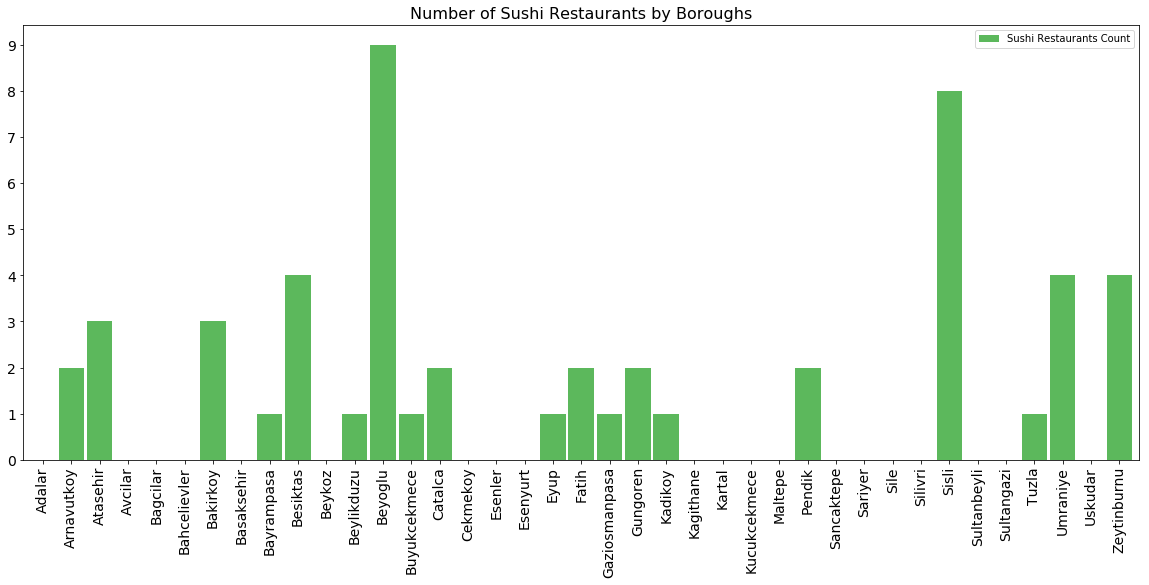

In [41]:
df[['Sushi Restaurants Count']].plot(kind='bar',
                                    width=0.9,
                                    figsize=(20, 8),
                                    color=['#5cb85c', '#5bc0de'],
                                    fontsize=14)

plt.title("Number of Sushi Restaurants by Boroughs", fontsize=16)
plt.yticks(np.arange(min(df['Sushi Restaurants Count']), max(df['Sushi Restaurants Count']) + 1, 1))
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)

plt.show()

As seen in the bar chart, there are not many sushi restaurants in Istanbul. The borough with the most is Beyoglu with 9 which makes sense as Beyoglu is one of the dining centers in Istanbul. Out of 39 boroughs, 20 of them did not have a sushi restaurant at all.

### 3.2. Population vs Number of Sushi Restaurants for Each Borough ###

In order to see populations and numbers of sushi restaurants side by side I will put the populations as 10000s on the chart.


In [42]:
df['Population (x10000)'] = df['Population'] / 10000

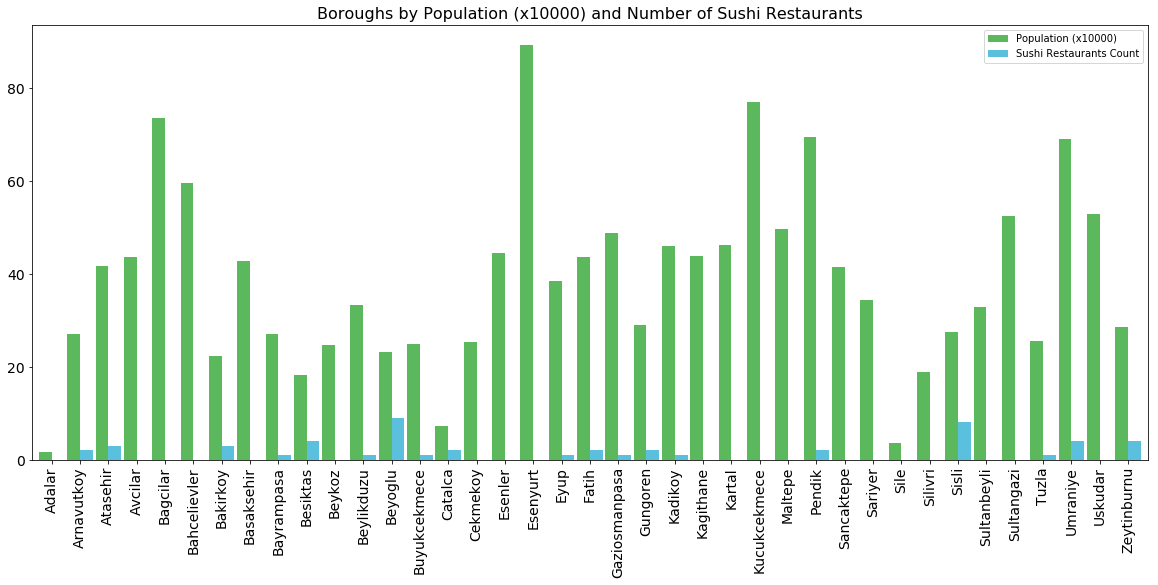

In [43]:
df[['Population (x10000)', 'Sushi Restaurants Count']].plot(kind='bar',
                                                            width=0.9,
                                                            figsize=(20, 8),
                                                            color=['#5cb85c', '#5bc0de'],
                                                            fontsize=14)

plt.title("Boroughs by Population (x10000) and Number of Sushi Restaurants", fontsize=16)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)

plt.show()

The above bar chart shows that there are indeed very promising boroughs to open a sushi restaurant such as Esenyurt which has a population of 891,120 and no sushi restaurants.

### 3.3. Sushi Restaurants Choropleth Map of Boroughs ###

Let's have a look at the choropleth map of the sushi restaurants in Istanbul

We need to exclude Uskudar since it does not have geometry info

In [44]:
df.reset_index(inplace = True)
df2 = df[['Borough', 'geometry']]
df2 = df2[df2.Borough != 'Uskudar']

For marking the boroughs let's define a function

In [45]:
def mark_boroughs(map_object):
    for borough, lat, lng, count in zip( df['Borough'], df['Latitude'], df['Longitude'], df['Sushi Restaurants Count'] ):
        label = folium.Popup(borough + ': ' + str(count), parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=2,
            popup=label,
            color='green',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.3).add_to(map_object)

In [46]:
# create map of Istanbul using latitude and longitude values
istanbul_map = folium.Map(location=[latitude, longitude], zoom_start=10)  
    
istanbul_map.choropleth(
    geo_data=df2,
    data=df,
    columns=['Borough', 'Sushi Restaurants Count'],
    key_on='feature.properties.Borough',
    fill_color = 'YlOrRd',
    fill_opacity = 0.5,
    line_opacity=0.2,
    legend_name='Sushi Restaurants in Istanbul'
)

mark_boroughs(istanbul_map)
    
# show map
istanbul_map

/usr/local/anaconda3/lib/python3.7/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### 3.4. Choropleth Map of Borough Populations ###

Let's have another look at the choropleth map of the borough populations in Istanbul.

In [47]:
# create map of Istanbul using latitude and longitude values
istanbul_map = folium.Map(location=[latitude, longitude], zoom_start=10)  
    
istanbul_map.choropleth(
    geo_data=df2,
    data=df,
    columns=['Borough', 'Population'],
    key_on='feature.properties.Borough',
    fill_color = 'YlOrRd',
    fill_opacity = 0.5,
    line_opacity=0.2,
    legend_name='Populations of Istanbul Boroughs'
)

mark_boroughs(istanbul_map)

# show map
istanbul_map

This map shows that not all population lives in the Central Istanbul, there are boroughs which have great populations and were not red(ish) in the previous map.

### 3.5. Population / Sushi Restaurants Ratio ###

Let's see how many people can our new sushi restaurant serve in each borough.

In [48]:
df['Population / Sushi Restaurants'] = df['Population'] / (df['Sushi Restaurants Count'] + 1)
df.set_index('Borough', inplace = True)

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


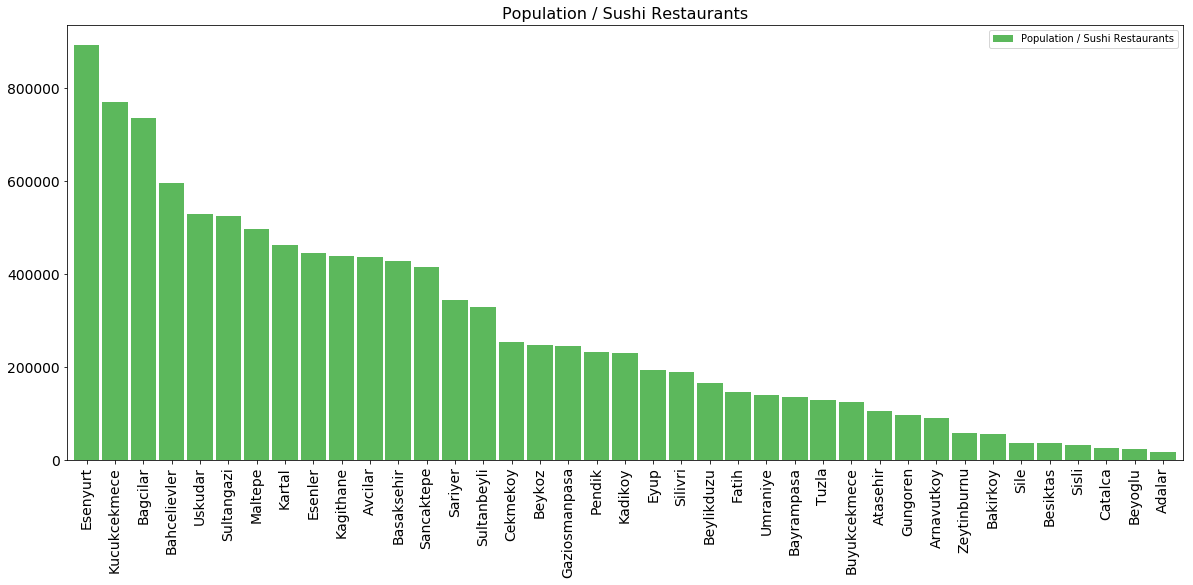

In [49]:
df[['Population / Sushi Restaurants']].sort_values(by=['Population / Sushi Restaurants'], ascending=False).plot(
    kind='bar',
    width=0.9,
    figsize=(20, 8),
    color='#5cb85c',
    fontsize=14)

plt.title("Population / Sushi Restaurants", fontsize=16)

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)

plt.show()

## 5. Conclusions ##
By using public geojson file obtained from Spatial Data Repository of NYU and the list from Wikipedia, I gathered the location and population of the boroughs of Istanbul. With the help from the Foursquare API, I got the numbers of sushi restaurants in each of these boroughs. Exploratory analysis of this data showed that

* Esenyurt, Kucukcekmece, and Bagcilar are some of the promising borough to open a sushi restaurant.
* Beyoglu is the best borough if you are interested in sushi restaurants.

## 6. Discussions ##
* The ranking solely depends on population and number of restaurants in each borough.
* The accuracy of data depends on the data provided by FourSquare.

We could make a better analysis if we had the chance to procure additional data such as
* Preferences of food types of Turkish people, specifically corresponding sushi preference,
* Boroughs consideration mostly for visiting, pleasure, residential
* Modernity of people living in the boroughs

## 7. References ##
1. [Second-level Administrative Divisions, Turkey, 2015](https://geo.nyu.edu/catalog/stanford-nj696zj1674) from Spatial Data Repository of NYU

2. [List of districts of Istanbul](https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul) Wikipedia page

3. [Foursquare API](https://developer.foursquare.com/)

4. [Housing Sales Prices & Venues Data Analysis of Istanbul](https://www.linkedin.com/pulse/housing-sales-prices-venues-data-analysis-ofistanbul-sercan-y%C4%B1ld%C4%B1z/) by Sercan Yıldız